# SaaS Sales Dataset Analysis

# Dataset
This dataset contains transaction data from a fictitious SaaS company selling sales and marketing software to other companies (B2B). In the dataset, each row represents a single transaction/order (_9,994 transactions_), and the columns include:


| **Column Name**  | **Description**                                                                 |
|------------------|---------------------------------------------------------------------------------|
| Row ID           | A unique identifier for each transaction.                                        |
| Order ID         | A unique identifier for each order.                                              |
| Order Date       | The date when the order was placed.                                              |
| Date Key         | A numerical representation of the order date (YYYYMMDD).                        |
| Contact Name     | The name of the person who placed the order.                                     |
| Country          | The country where the order was placed.                                          |
| City             | The city where the order was placed.                                             |
| Region           | The region where the order was placed.                                           |
| Subregion        | The subregion where the order was placed.                                        |
| Customer         | The name of the company that placed the order.                                   |
| Customer ID      | A unique identifier for each customer.                                           |
| Industry         | The industry the customer belongs to.                                            |
| Segment          | The customer segment (SMB, Strategic, Enterprise, etc.).                         |
| Product          | The product that was ordered.                                                    |
| License          | The license key for the product.                                                 |
| Sales            | The total sales amount for the transaction.                                      |
| Quantity         | The total number of items in the transaction.                                    |
| Discount         | The discount applied to the transaction.                                         |
| Profit           | The profit from the transaction.                                                 |


Below the top and bottom five rows of the dataset are displayed.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, skew

df = pd.read_csv('SaaS-Sales.csv')

## Goals
The objective of this analysis is to *identify high-demand products* for prioritization in investment and development. We will focus on:

- Identifying **top products** based on **sales** and **profit** performance.
- Analyzing **demand** from key customers, segments, and industries.
- Examining **global market trends** and geographical demand variations.
- Conducting **correlation analysis** to evaluate relationships between **sales**, **profit**, **discounts**, and **profit margins** to inform profitability strategies.


In [70]:
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


# Data Understanding and Cleaning

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [72]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


Next, we will see the unique values in every columns.



In [73]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


Some general insights so far:
* The dataset has 19 columns and 9994 rows.
* There are most likely no missing values in the dataset. (No NaN values)
* There are 9994 unique `Row ID` values for each entry, but only 5009 unique `Order ID` values. Further analysis is needed to determine if this is an error.
* Some columns can be dropped due to its irrelevance to analysis, such as:
  * column `Row ID`, which contains unique ID for each entry.
  * `Date Key`, which contains the same info as `Order Date`.
* `Order Date` should be converted from object to datetime for easier handling in further analysis.
* `Customer ID` should be converted from int to object since it is not a feature that needed to be analyzed numerically.
* It might be beneficial to add a new feature `Profit Margin` to understand the percentage of profit each entry is making.

In [74]:
# Convert 'Order Date' and 'Customer ID'
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Customer ID'] = df['Customer ID'].astype(str)

# Drop 'Row ID' and 'Date Key
df = df.drop(columns=['Row ID','Date Key'])

# Add column 'Profit Margin'
df['Profit Margin'] =round((df['Profit']/df['Sales'])*100,  2)

In [75]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Contact Name   9994 non-null   object        
 3   Country        9994 non-null   object        
 4   City           9994 non-null   object        
 5   Region         9994 non-null   object        
 6   Subregion      9994 non-null   object        
 7   Customer       9994 non-null   object        
 8   Customer ID    9994 non-null   object        
 9   Industry       9994 non-null   object        
 10  Segment        9994 non-null   object        
 11  Product        9994 non-null   object        
 12  License        9994 non-null   object        
 13  Sales          9994 non-null   float64       
 14  Quantity       9994 non-null   int64         
 15  Discount       9994 n

## Check for missing values

In [76]:
# Percentage of missing values
df.isna().sum()/df.shape[0]*100

,0
Order ID,0.0
Order Date,0.0
Contact Name,0.0
Country,0.0
City,0.0
Region,0.0
Subregion,0.0
Customer,0.0
Customer ID,0.0
Industry,0.0


It is confirmed that there are no missing values in the dataset.

## Check for whitespace

In [77]:
# Check for leading/trailing whitespace in object columns
for col in df.select_dtypes(include='object'):
  if df[col].str.contains(r'^\s+|\s+$').any():  # Check for leading/trailing spaces
    print(f"Column '{col}' has excessive whitespace.")
  if df[col].str.contains(r'\s{2,}').any():  # Check for multiple spaces within the string
    print(f"Column '{col}' has multiple spaces within the string.")

There is no excessive whitespace in the dataset.

## Check for duplicated data

Now, we check for duplicated data.
* Check on duplicate rows to see if there are duplicated data in general.
* We also check on the `Order ID` to follow up on the previous insight that we only have 5009 unique `Order ID` values.

In [78]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

# Check for duplicates based on 'Order ID'
df[df['Order ID'].duplicated(keep=False)].head()
duplicate_orders = df[df['Order ID'].duplicated(keep=False)]
if not duplicate_orders.empty:
    print("\nDuplicate orders found:")
    print(duplicate_orders)
else:
    print("\nNo duplicate orders found.")

No duplicate rows found.

Duplicate orders found:
              Order ID Order Date       Contact Name        Country  \
0     EMEA-2022-152156 2022-11-09        Nathan Bell        Ireland   
1     EMEA-2022-152156 2022-11-09        Nathan Bell        Ireland   
3     EMEA-2021-108966 2021-10-11         Zoe Hodges        Germany   
4     EMEA-2021-108966 2021-10-11         Zoe Hodges        Germany   
5     AMER-2020-115812 2020-06-09      Thomas Hodges  United States   
...                ...        ...                ...            ...   
9987  EMEA-2023-163629 2023-11-18      Dylan Dickens        Finland   
9988  EMEA-2023-163629 2023-11-18      Dylan Dickens        Finland   
9990  AMER-2023-121258 2023-02-27  Anthony Sanderson  United States   
9991  AMER-2023-121258 2023-02-27  Anthony Sanderson  United States   
9992  AMER-2023-121258 2023-02-27  Anthony Sanderson  United States   

               City Region Subregion           Customer Customer ID  \
0            Dublin   EMEA

No duplicate rows are found.

There are a lot of duplicate order IDs. Upon inspection,  this happens because there are multiple products being ordered in one order, so no further action is needed.

## Check for outliers

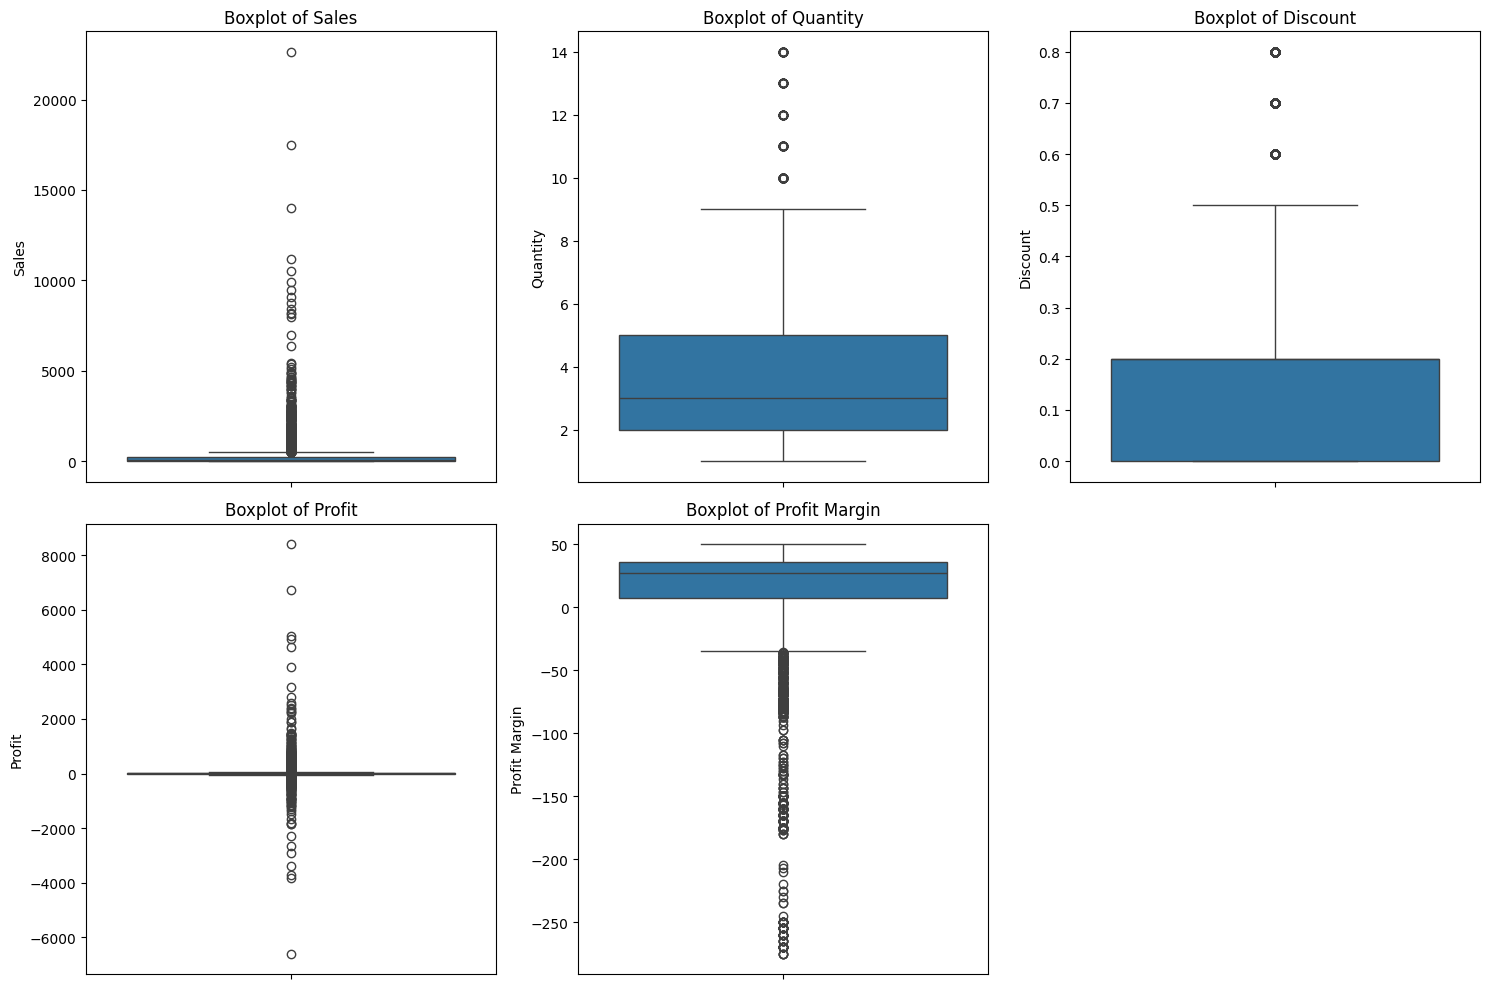

In [79]:
# Check for outliers using boxplot
numerical_features = ['Sales', 'Quantity', 'Discount', 'Profit', 'Profit Margin']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [80]:
# Check for outliers using IQR
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return round(lower_bound), round(upper_bound), outliers

outlier_results = []

for col in numerical_features:
    lower_bound, upper_bound, outliers = detect_outliers(df[col])
    outlier_count = len(outliers)
    outlier_indices = outliers.index.tolist()
    outlier_results.append([col, lower_bound, upper_bound, outlier_count, outlier_indices])

outlier_df = pd.DataFrame(outlier_results, columns=['Column', 'Lower Bound', 'Upper Bound', 'Number of Outliers', 'Outlier Indices'])
outlier_df

,Column,Lower Bound,Upper Bound,Number of Outliers,Outlier Indices
0,Sales,-272,499,1167,"[1, 3, 7, 10, 11, 16, 24, 27, 35, 38, 54, 67, ..."
1,Quantity,-2,10,170,"[113, 139, 147, 251, 329, 341, 342, 343, 375, ..."
2,Discount,0,0,856,"[14, 15, 28, 32, 36, 75, 76, 78, 95, 101, 105,..."
3,Profit,-40,71,1881,"[1, 3, 7, 10, 13, 14, 24, 27, 35, 36, 38, 54, ..."
4,Profit Margin,-36,79,952,"[3, 14, 15, 27, 28, 32, 36, 75, 76, 78, 95, 10..."


**Insights**:

* **Sales**

    This feature has a large amount of outliers (1167). This indicates that sales figures that is much higher than expected values frequently happens.

* **Quantity**

    This feature has a far less amount of outliers (170). This indicates that orders that include a much higher or lower quantity of products happen far less frequently.

* **Discount**

    This feature has both the lower and upper bound of 0, which indicates that the almost all of values in this column is 0. Therefore, the 856 outliers are the values that are higher than 0 (as this column only contains positive values).

* **Profit**

    This feature, similar to `Sales`, has a high amount of outliers (1881). This indicates that there are a lot of occurences where the profits are much higher or lower than expected values.


**Implications:**

Although the dataset contains a very high amount of outliers, it appears that they do not appear out of error and are important to analyze the trend. Therefore, no further actions will be taken at this time.


## Distribution and normality of data

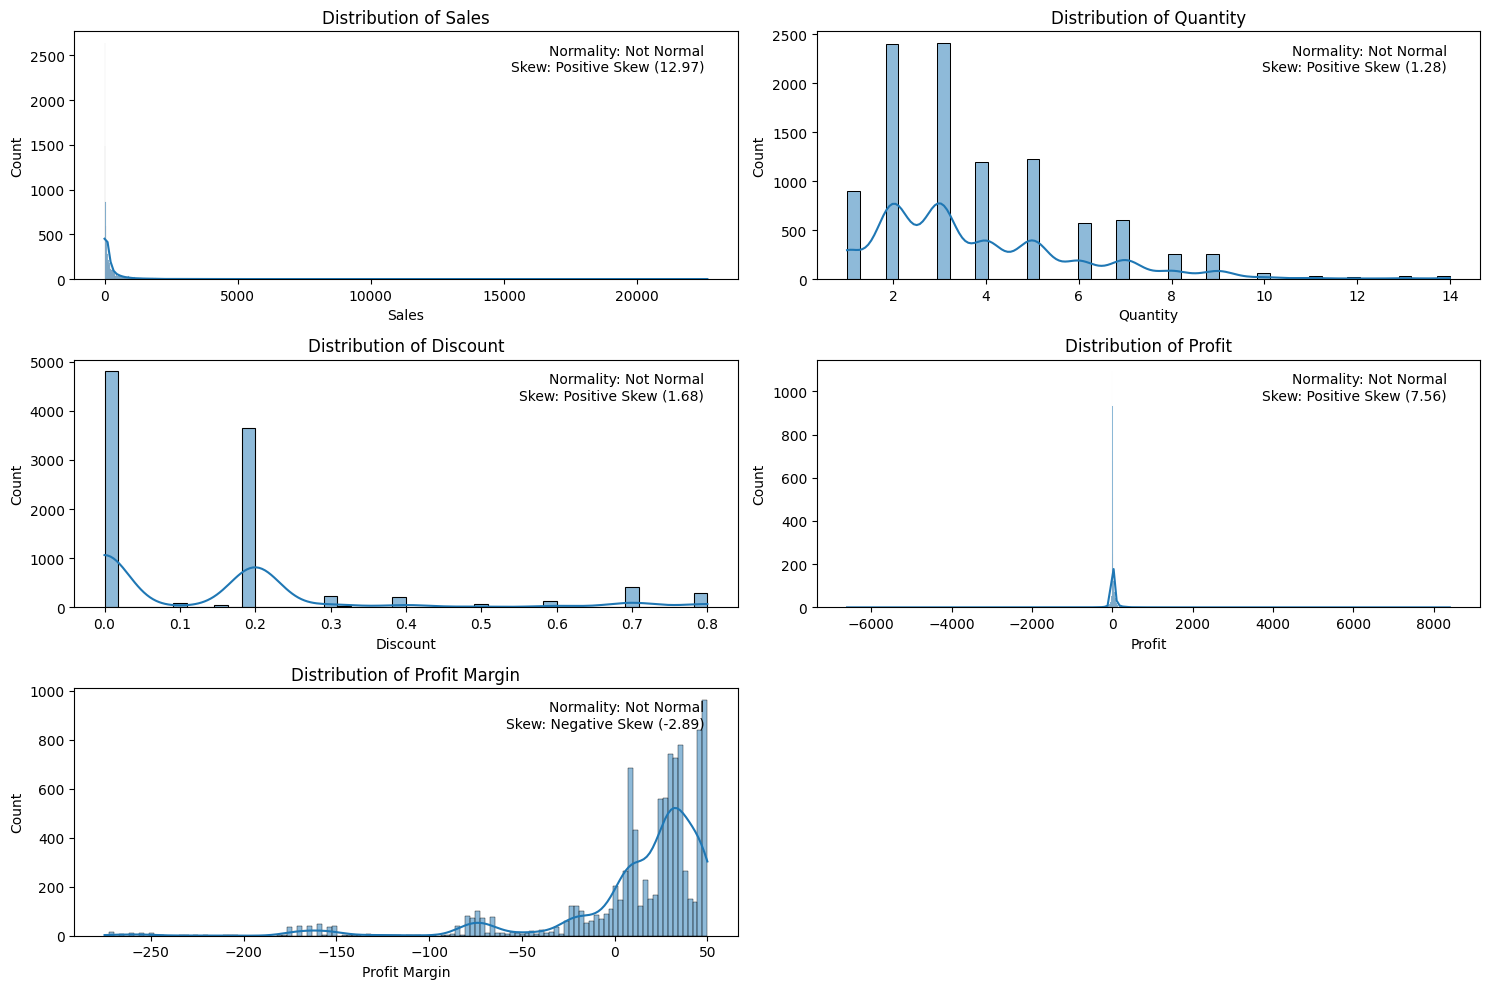

In [81]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Normality test
    k2, p = normaltest(df[col])
    normality = "Normal" if p > 0.05 else "Not Normal"

    # Skewness
    sk = skew(df[col])
    skew_type = "Positive Skew" if sk > 0 else "Negative Skew" if sk < 0 else "No Skew"

    plt.text(0.95, 0.95, f"Normality: {normality}\nSkew: {skew_type} ({round(sk,2)})",
             transform=plt.gca().transAxes, ha='right', va='top')

plt.tight_layout()
plt.show()

In [82]:
df[numerical_features].describe()

,Sales,Quantity,Discount,Profit,Profit Margin
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,12.031390
std,623.245101,2.225110,0.206452,234.260108,46.675436
min,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,17.280000,2.000000,0.000000,1.728750,7.500000
50%,54.490000,3.000000,0.200000,8.666500,27.000000
75%,209.940000,5.000000,0.200000,29.364000,36.250000
max,22638.480000,14.000000,0.800000,8399.976000,50.000000


Due to the large amount of outliers in `Sales` and `Profit`, it is difficult to analyze the distribution of values in those columns. For this purpose, outliers will be removed.

In [83]:
# Removing extreme outliers based on IQR for 'Sales' and 'Profit'
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

# Removing outliers for 'Sales'
df_clean = remove_outliers(df, 'Sales')

# Removing outliers for 'Profit' from the already filtered dataframe
df_clean = remove_outliers(df_clean, 'Profit')

outliers_removed = len(df) - len(df_clean)
print(f"{outliers_removed} outliers removed.")

2602 outliers removed.


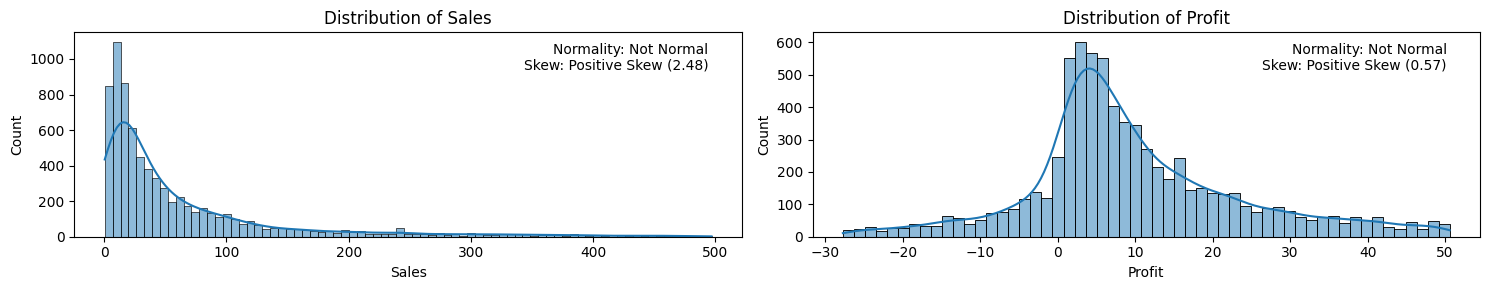

,Sales,Profit
count,7392.000000,7392.000000
mean,62.314599,9.636050
std,82.271335,13.843595
min,0.444000,-27.735000
25%,12.960000,2.133200
50%,30.560000,6.797800
75%,75.850000,16.016250
max,496.860000,50.584800


In [84]:
plt.figure(figsize=(15, 3))

for i, col in enumerate(['Sales','Profit']):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Normality test
    k2, p = normaltest(df_clean[col])
    normality = "Normal" if p > 0.05 else "Not Normal"

    # Skewness
    sk = skew(df_clean[col])
    skew_type = "Positive Skew" if sk > 0 else "Negative Skew" if sk < 0 else "No Skew"

    plt.text(0.95, 0.95, f"Normality: {normality}\nSkew: {skew_type} ({round(sk,2)})",
             transform=plt.gca().transAxes, ha='right', va='top')

plt.tight_layout()
plt.show()

df_clean[['Sales','Profit']].describe()

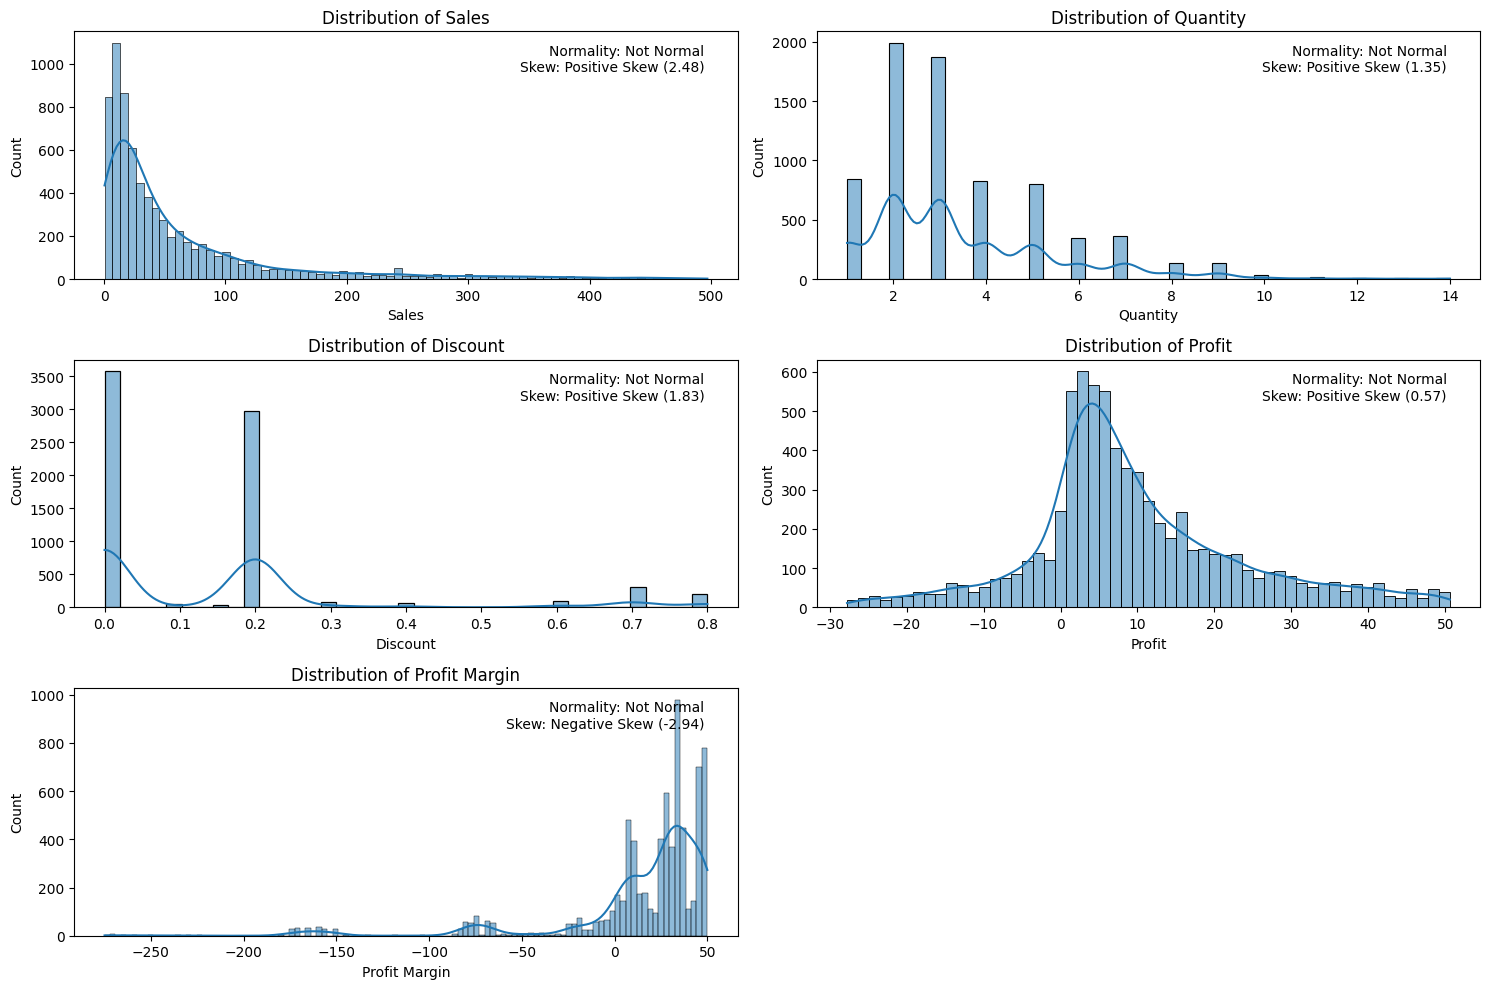

,Sales,Quantity,Discount,Profit,Profit Margin
count,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000
mean,62.314599,3.464962,0.148635,9.636050,15.797938
std,82.271335,2.041211,0.199668,13.843595,42.460261
min,0.444000,1.000000,0.000000,-27.735000,-275.000000
25%,12.960000,2.000000,0.000000,2.133200,8.750000
50%,30.560000,3.000000,0.200000,6.797800,29.000000
75%,75.850000,5.000000,0.200000,16.016250,37.500000
max,496.860000,14.000000,0.800000,50.584800,50.000000


In [85]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Normality test
    k2, p = normaltest(df_clean[col])
    normality = "Normal" if p > 0.05 else "Not Normal"

    # Skewness
    sk = skew(df_clean[col])
    skew_type = "Positive Skew" if sk > 0 else "Negative Skew" if sk < 0 else "No Skew"

    plt.text(0.95, 0.95, f"Normality: {normality}\nSkew: {skew_type} ({round(sk,2)})",
             transform=plt.gca().transAxes, ha='right', va='top')

plt.tight_layout()
plt.show()

df_clean[numerical_features].describe()

It appears that there are a significant number of negative profit in the dataset. So we check the percentage of these transactions.

In [86]:
# Calculate the percentage of negative profit in the original and cleaned dataframes
neg_profit_df = len(df[df['Profit'] < 0]) / len(df) * 100
neg_profit_df_clean = len(df_clean[df_clean['Profit'] < 0]) / len(df_clean) * 100

print(f"Percentage of negative profit (with outliers): {neg_profit_df:.2f}%")
print(f"Percentage of negative profit (without outliers): {neg_profit_df_clean:.2f}%")

Percentage of negative profit (with outliers): 18.72%
Percentage of negative profit (without outliers): 14.65%


**Insights**:
* **Sales**

    * This feature is _highly positively skewed_. This indicates a high frequency of low sales values with a few very high sales values that significantly affect the mean.
    * Even after removing the outliers, `Sales` still has a strong positive skew. This suggests that a significant number of transactions have relatively low sales values, most of them close to 0 sales.

* **Quantity**

    This feature is _moderately positively skewed_. This indicates that most transactions involve a lower quantity of items sold with some transactions with larger quantities.

* **Discount**

    This feature is _moderately positively skewed_. Similar to `Quantity`, most discounts are low, with the majority at 0, but there are a few cases where higher discounts are offered.

* **Profit**

    * This feature is _highly positively skewed_. Most profits are on the lower end, but a few transactions with very high profits are affecting the mean. This indicates that the overall profitability is not uniformly distributed and that certain transactions are exceptionally profitable.
    * The descriptive analytics also reveals that there are transactions with extremely low profit (-6599) and extremely high profit (8399). Further analysis is needed.
    * Most concerningly, 19% of the transactions have a profit of below 0. Even with the outliers removed, 15% are still below 0. Further analysis is needed.

* **Profit Margin**

    This feature is _moderately negatively skewed_. This indicates that while most profit margins are high, there are some instances of very low or negative profit margins.


**Implications:**
* A significant amount of transactions have a negative profit. Further analysis is needed to see the factors that are involved in this trend.
* The distributions imply that a small number of high-value sales and profits are driving overall performance. Further analysis is needed to understand the reason of these exceptional cases.
* The negative skew in profit margin suggests that while most
transactions are quite profitable, some may require further investigation to understand why certain sales have low margins.
* There is a large amount of even the most extreme outliers in the data (2602 outliers for only Sales and Profit). Thus, utliers will not be removed for the analysis to avoid the loss of a significant amount of data.

# Data Analysis and Visualization



## Sales Analysis


### Typical sales performance by product
Due to the high skew of Sales and the presence of extreme outliers, to analyze the typical performance of each product, their **median** would be more indicative of that instead of mean.

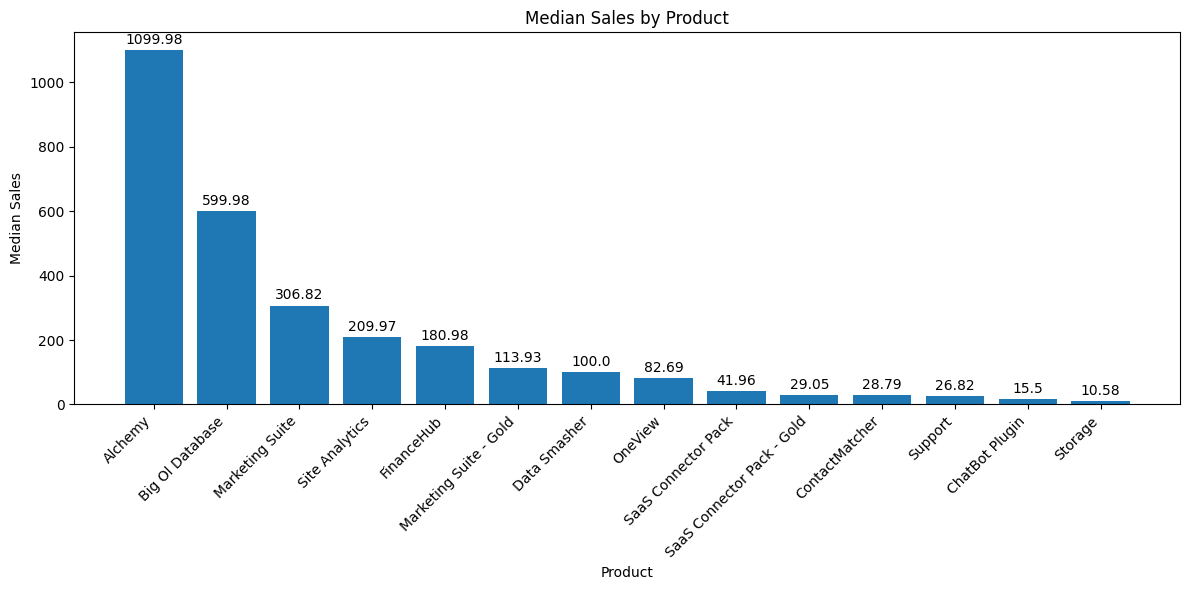

In [87]:
# Median sales by product
median_sales_by_product = df.groupby('Product')['Sales'].median().sort_values(ascending=False)

# Barplot
plt.figure(figsize=(12, 6))
bars = plt.bar(median_sales_by_product.index, median_sales_by_product.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval,2), ha='center', va='bottom')

plt.xlabel("Product")
plt.ylabel("Median Sales")
plt.title("Median Sales by Product")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights:**
* The highest performing products are **Alchemy, Big Ol Database,  and Marketing Suite**.
* **Storage, ChatbotPlugin, Support, and ContactMatcher** are the four lowest performing products. Further analysis is needed to see what improvements needed to be made.

### Sales trend by time

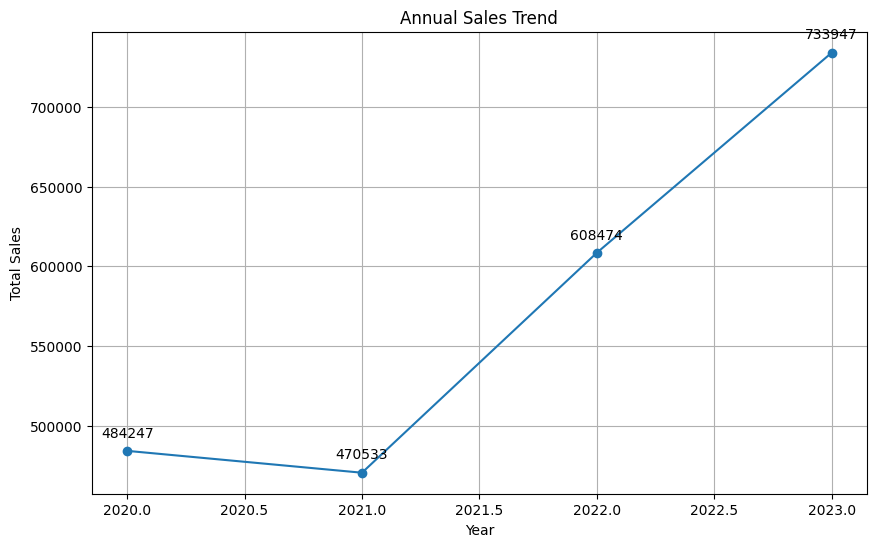

In [88]:
annual_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(annual_sales.index, annual_sales.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Annual Sales Trend')

for x, y in zip(annual_sales.index, annual_sales.values):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()

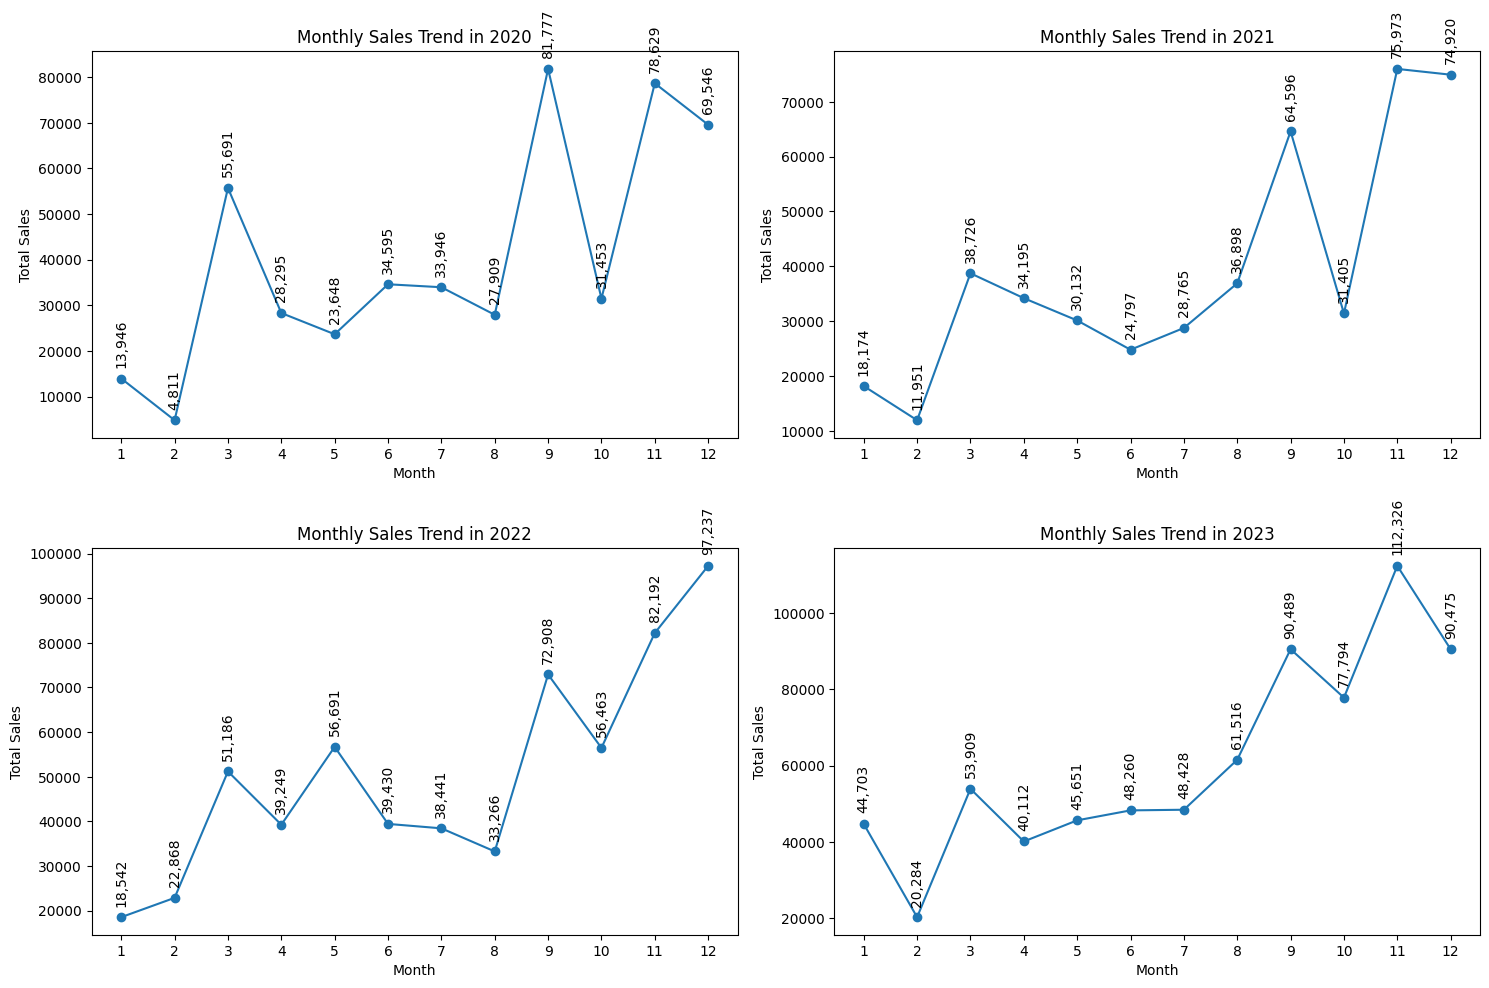

In [89]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

years = [2020, 2021, 2022, 2023]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, year in enumerate(years):
    df_year = df[(df['Year'] == year)]
    monthly_sales = df_year.groupby('Month')['Sales'].sum()

    axes[i].plot(monthly_sales.index, monthly_sales.values, marker='o')
    axes[i].set_xticks(monthly_sales.index)
    axes[i].set_title(f"Monthly Sales Trend in {year}")
    axes[i].set_xlabel("Month")
    axes[i].set_ylabel("Total Sales")

    for x, y in zip(monthly_sales.index, monthly_sales.values):
        axes[i].annotate(f'{y:,.0f}', (x, y), textcoords="offset points", rotation=90, xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

**Insights:**
* *Annual sales trend*: While there is a slight dip in 2021, from there onwards there is a consistent increase to the most recent data (2023), where it peaks.
* *Monthly sales trend*:  
Each year, sales fluctuates over the month differently. However, a general pattern can be detected:
  * Lowest sales in the first two months,
  * Significant increase of sales on March,
  * Fluctuation differs from month 4-8,
  * Another significant increase on September,
  * A dip of sales in month 10,
  * Peak of sales in month 11 or 12.

With an overall upward trend towards the end of the year.


## Profit Analysis

### Profit by product
In the previous section, we have identified a point of interest in the Profit column, particularly the significant amount of transactions with negative profit. First we investigate the total profit per product.

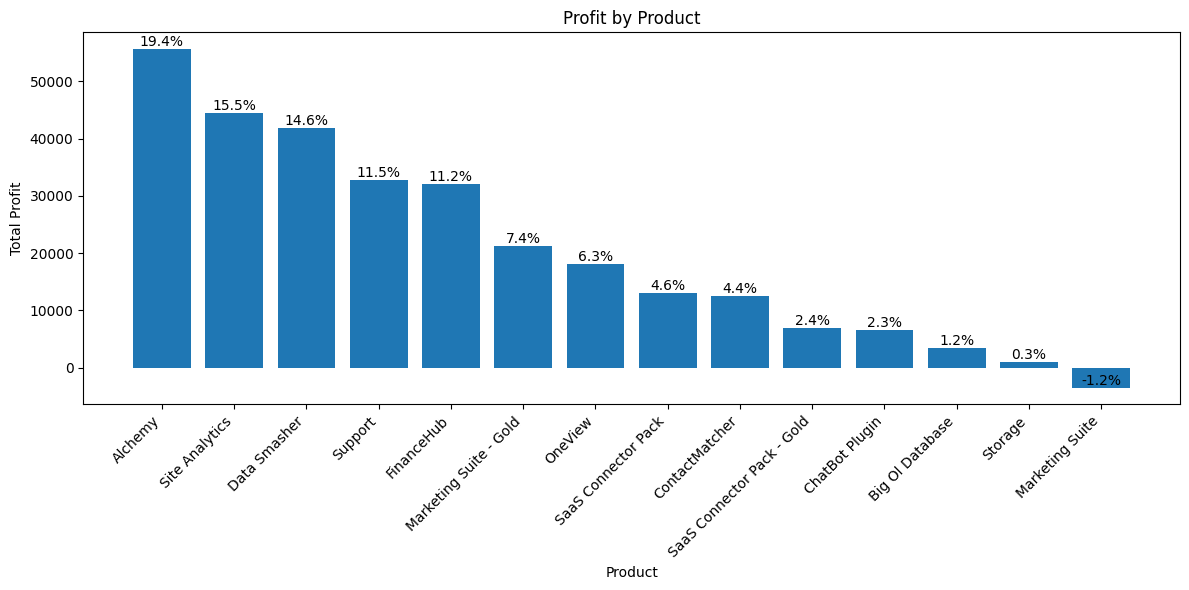

In [90]:
# Group by product and sum profits
product_profit = df.groupby('Product')['Profit'].sum().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(product_profit.index, product_profit.values)
plt.xlabel("Product")
plt.ylabel("Total Profit")
plt.title("Profit by Product")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add percentage labels above each bar
total_profit = product_profit.sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_profit) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Insights**
* Top performers:
  
  * Almost all products have a positive total profit, with the top performers being **Alchemy**, Site Analytics, and Data Smasher contributing 19.4%, 15.5%, and 14.6% of total profit respectively.
  * Further investment towards these products should be considered.
  
* Low performers:
  
  * Big Ol Database, Storage, and Marketing Suite are the three products with the lowest profit.
  * In particular,  **Marketing Suite** is the only product that yields negative profits.
  
* Products such as Big Ol Database and Marketing Suite need to be analyzed further, as they are the top performers based on Sales but lowest performers based on Profit. This might be due to discounts that affect the profitability of the products immensely.
  

### Profit trend by time

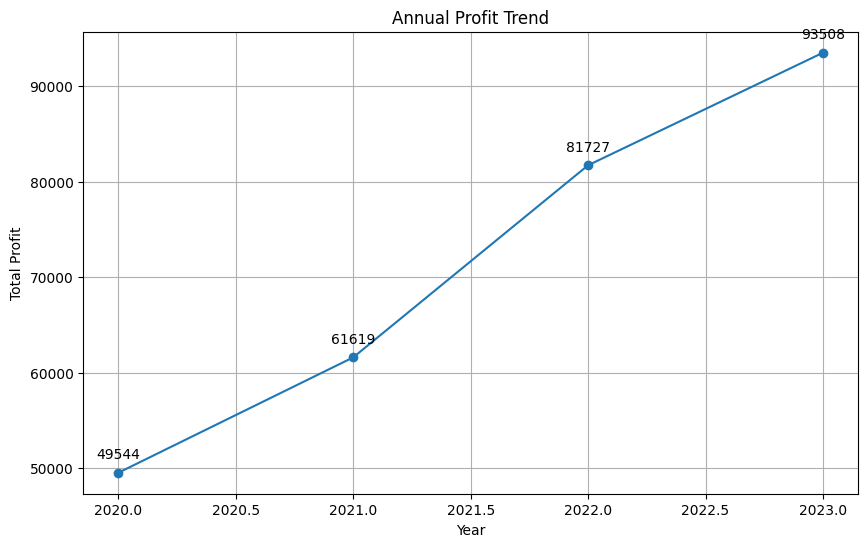

In [91]:
annual_profit = df.groupby(df['Order Date'].dt.year)['Profit'].sum()

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(annual_profit.index, annual_profit.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Annual Profit Trend')

for x, y in zip(annual_profit.index, annual_profit.values):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()

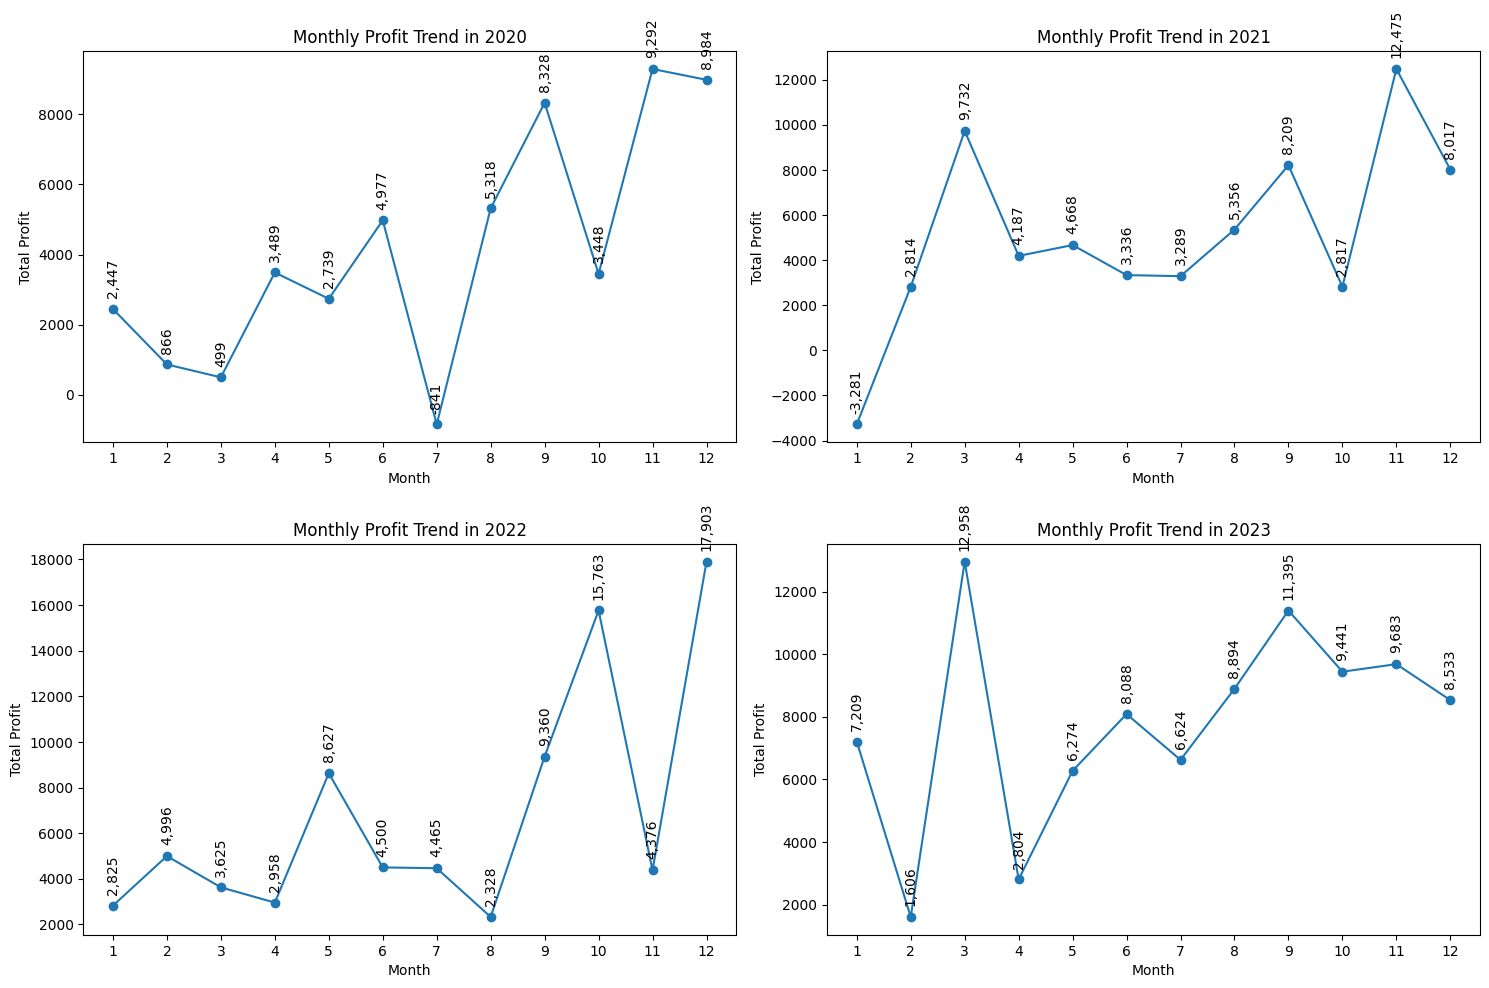

In [92]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

years = [2020, 2021, 2022, 2023]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, year in enumerate(years):
    df_year = df[(df['Year'] == year)]
    monthly_profit = df_year.groupby('Month')['Profit'].sum()

    axes[i].plot(monthly_profit.index, monthly_profit.values, marker='o')
    axes[i].set_xticks(monthly_sales.index)
    axes[i].set_title(f"Monthly Profit Trend in {year}")
    axes[i].set_xlabel("Month")
    axes[i].set_ylabel("Total Profit")

    for x, y in zip(monthly_profit.index, monthly_profit.values):
        axes[i].annotate(f'{y:,.0f}', (x, y), textcoords="offset points", rotation=90, xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

**Insights:**
* *Annual profit trend*: Similar to sales trend, profit increases consistently with the peak in 2023.
* *Monthly profit trend*:  
The monthly fluctuation of profit is very different from that of the sales, with much less detectable general trend.
  * From year 2020-2022, similar trend to sales can be observed, where it starts with low profit and an overall upward trend towards the end of the year, which indicate *sustained growth*.
  * In these years, the profit also peaks at the end of the year, which indicates *high profit at holiday time*.
  * However in the most recent year, the fluctuation is very different where it starts at average and ends in average as well, with significant dips in months 2 and 4. Notably, the observed pattern of *sustained growth * and *high holiday profits* are missing.


## Top Customers Analysis

We analyze the highest purchasers to identify the products in high demand from them.

In [93]:
def aggregate_customer(df):
  # Groups df by customer id and aggregates sales, country, segment, industry
  # Aggregate sales by total and mode for country, segment, and industry
  customer_agg = df.groupby('Customer ID').agg(
      {'Sales': 'sum',
       'Country': lambda x: x.mode()[0] if not x.mode().empty else None,
       'Segment': lambda x: x.mode()[0] if not x.mode().empty else None,
       'Industry': lambda x: x.mode()[0] if not x.mode().empty else None,
      }
  )
  return customer_agg

df_agg_customer = aggregate_customer(df)
df_agg_customer

,Sales,Country,Segment,Industry
Customer ID,,,,
1001,12617.1140,United States,Strategic,Healthcare
1002,27278.5930,United States,SMB,Healthcare
1003,39941.6400,United States,SMB,Finance
1004,23189.2165,United States,SMB,Tech
1005,33514.9210,United States,Strategic,Finance
...,...,...,...,...
1097,29483.0050,Japan,Strategic,Communications
1098,22650.8206,United Kingdom,SMB,Transportation
1099,23180.5442,United Kingdom,SMB,Finance


In [94]:
top10_customers = df_agg_customer.sort_values(by='Sales', ascending=False).head(10)
top10_customers

,Sales,Country,Segment,Industry
Customer ID,,,,
1029,55719.2100,United States,SMB,Healthcare
1009,43893.0424,United States,SMB,Manufacturing
1080,42904.1670,United States,SMB,Finance
1011,41255.9471,United States,SMB,Finance
1093,41220.4188,United States,Strategic,Energy
1060,40360.1630,United States,SMB,Retail
1088,40326.3440,United States,SMB,Consumer Products
1003,39941.6400,United States,SMB,Finance
1007,39234.7610,United States,SMB,Healthcare


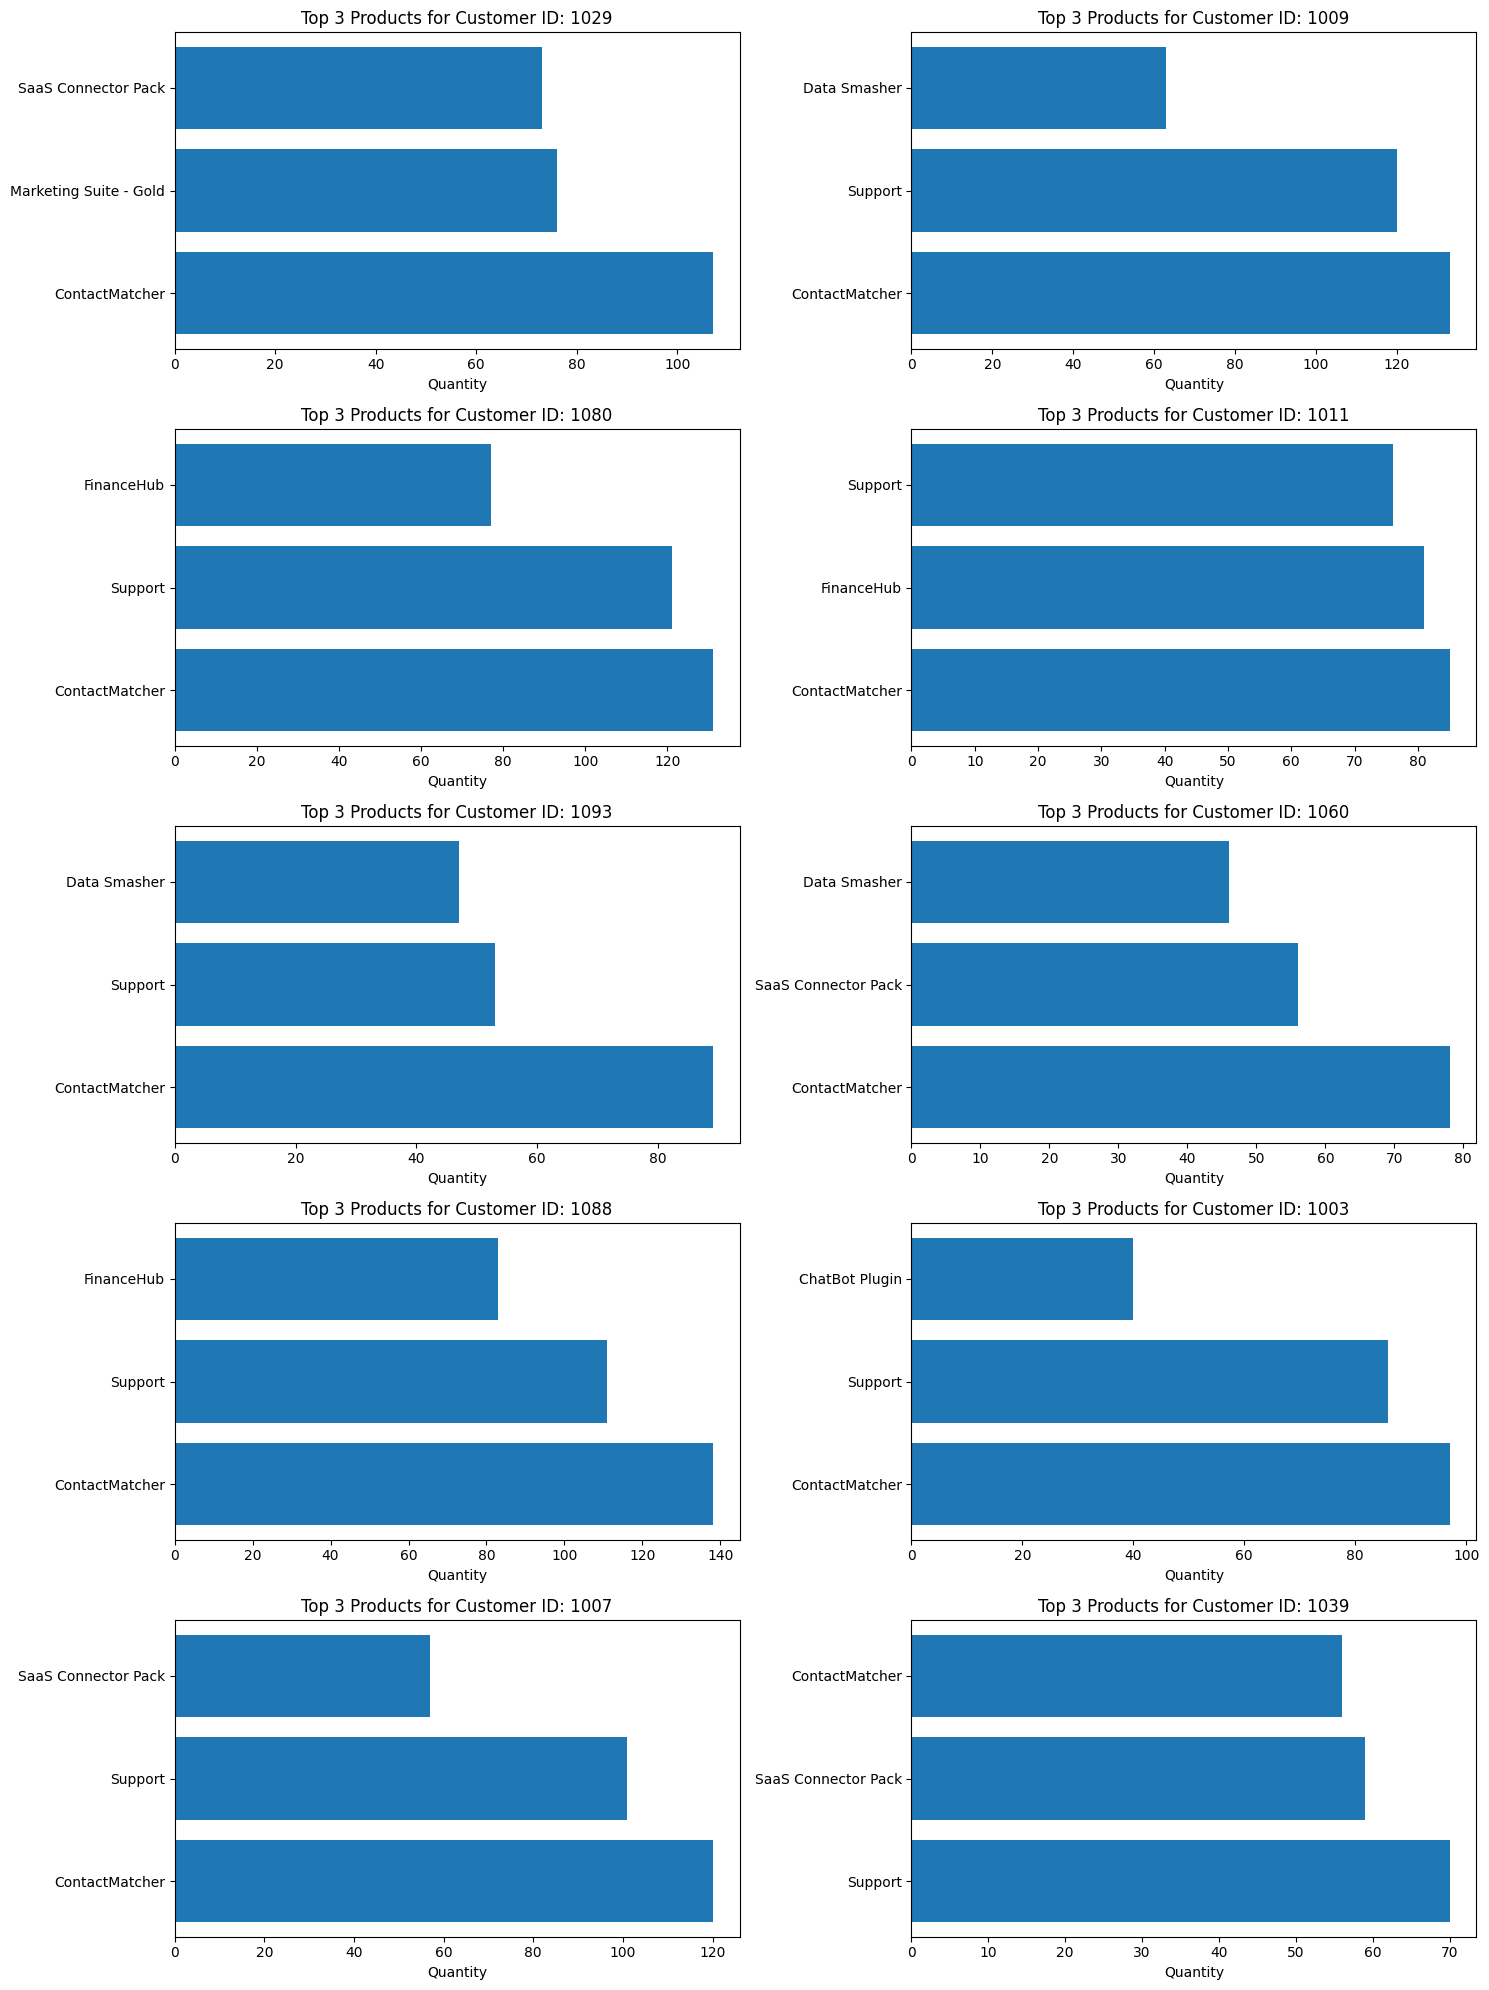

In [95]:
def top_products_by_customer(df, top_10_customers):
    fig, axes = plt.subplots(5, 2, figsize=(15, 20))
    axes = axes.ravel()

    for i, customer_id in enumerate(top_10_customers.index):
        customer_df = df[df['Customer ID'] == customer_id]
        top_products = customer_df.groupby('Product')['Quantity'].sum().nlargest(3)

        axes[i].barh(top_products.index, top_products.values)
        axes[i].set_title(f'Top 3 Products for Customer ID: {customer_id}')
        axes[i].set_xlabel('Quantity')

    plt.tight_layout()
    plt.show()

top_products_by_customer(df, top10_customers)

**Insights:**
* Customer features:
  * Location: The top 9 customers are based in the US.
  * Segment: 9 out of 10 top customers are categorized as SMB (Small and Medium-sized Business).
  * Industry: Various industries, with the leading industries Finance (3), Healthcare(2), and Manufacturing (2).

* Highest purchased products:
  * For the top 9 customers, the most frequently purchased product is `ContactMatcher`. This indicates that `ContactMatcher` is the driving product of customer loyalty.
  * Other most frequently purchased products by by top customers include **Support & SaaS Connector Pack**.

## Segment and Industry Analysis


In [126]:
segment_product = df.groupby(['Segment', 'Product'])['Order ID'].count().reset_index(name='Orders')

# Sort by segment and order count in descending order
segment_product = segment_product.sort_values(['Segment', 'Orders'], ascending=[True, False])

# Get top 3 products for each segment
top_products_by_segment = segment_product.groupby('Segment').head(3).reset_index(drop=True)
top_products_by_segment

,Segment,Product,Orders
0,Enterprise,ContactMatcher,324
1,Enterprise,Support,298
2,Enterprise,SaaS Connector Pack,175
3,SMB,ContactMatcher,939
4,SMB,Support,793
5,SMB,FinanceHub,518
6,Strategic,ContactMatcher,579
7,Strategic,Support,469
8,Strategic,FinanceHub,290


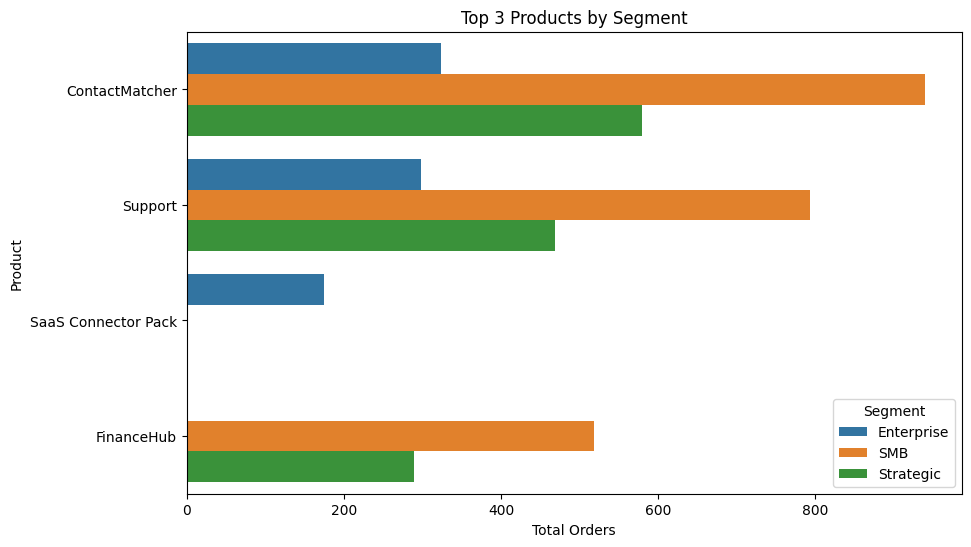

In [128]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Orders', y='Product', hue='Segment', data=top_products_by_segment)
plt.title('Top 3 Products by Segment')
plt.xlabel('Total Orders')
plt.ylabel('Product')
plt.show()

In [125]:
industry_product = df.groupby(['Industry', 'Product'])['Order ID'].count().reset_index(name='Orders')

# Sort by industry and order count in descending order
industry_product = industry_product.sort_values(['Industry', 'Orders'], ascending=[True, False])

# Get top 3 products for each industry
top_products_by_industry = industry_product.groupby('Industry').head(3).reset_index(drop=True)
top_products_by_industry

,Industry,Product,Orders
0,Communications,ContactMatcher,112
1,Communications,Support,93
2,Communications,SaaS Connector Pack,69
3,Consumer Products,ContactMatcher,187
4,Consumer Products,Support,137
5,Consumer Products,FinanceHub,110
6,Energy,ContactMatcher,236
7,Energy,Support,214
8,Energy,FinanceHub,131
9,Finance,ContactMatcher,402


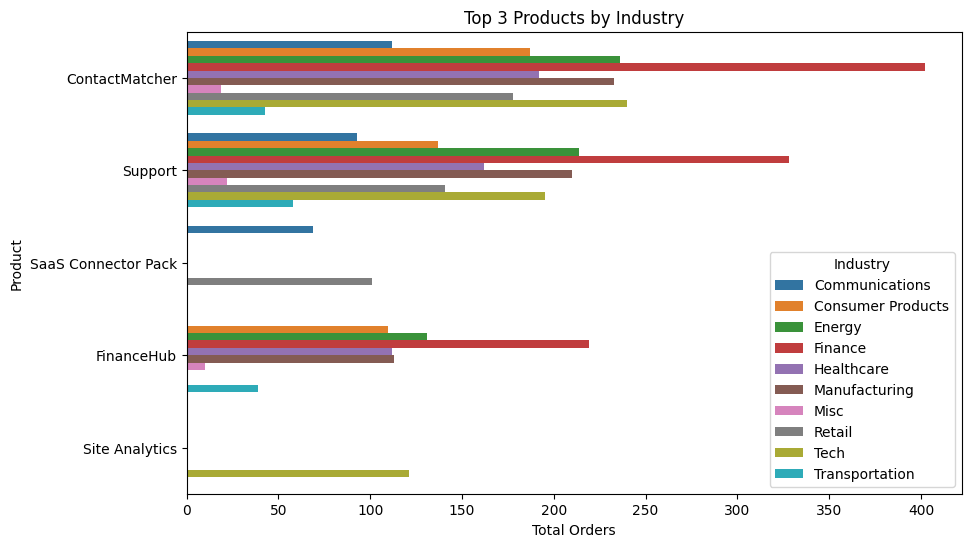

In [127]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Orders', y='Product', hue='Industry', data=top_products_by_industry)
plt.title('Top 3 Products by Industry')
plt.xlabel('Total Orders')
plt.ylabel('Product')
plt.show()

**Insights:**
* General:
  * Across both *Segments* and *Industries*, `ContactMatcher` stands out as the highest purchased product.
  * Other high-performing products include `Support` and `FinanceHub`.


##Geographic Data Analysis


In [153]:
top3_countries = df.groupby('Country')['Sales'].sum().nlargest(3).index
bot3_countries = df.groupby('Country')['Sales'].sum().nsmallest(3).index

In [155]:
def top_bottom_products(df, countries):
    results = []
    for country in countries:
        country_df = df[df['Country'] == country]
        if not country_df.empty:
            # Top 3 products
            top3 = country_df.groupby('Product')['Sales'].sum().nlargest(3)
            for product, sales in top3.items():
                results.append({'Country': country, 'Product': product, 'Rank': 'Top', 'Sales': sales})

            # Bottom 3 products
            bot3 = country_df.groupby('Product')['Sales'].sum().nsmallest(3)
            for product, sales in bot3.items():
                results.append({'Country': country, 'Product': product, 'Rank': 'Bottom', 'Sales': sales})

    return pd.DataFrame(results)

# Top and bottom products for top 3 countries
top_products = top_bottom_products(df, top3_countries)
top_products

,Country,Product,Rank,Sales
0,United States,ContactMatcher,Top,73903.400
1,United States,Site Analytics,Top,67964.536
2,United States,FinanceHub,Top,65978.508
3,United States,Storage,Bottom,479.530
4,United States,SaaS Connector Pack - Gold,Bottom,3237.340
5,United States,ChatBot Plugin,Bottom,5495.660
6,United Kingdom,FinanceHub,Top,47930.577
7,United Kingdom,Site Analytics,Top,47502.620
8,United Kingdom,ContactMatcher,Top,46396.570
9,United Kingdom,Storage,Bottom,286.510


**Insights:**
* US, UK, and Japan are the countries with highest sales performance.
* All 3 top countries have the same highest-performing products with variations of ranking: `ContactMatcher`,  `Site Analytics`, and `FinanceHub`.
* The lowest-performing product for the top 3 countries is consistently `Storage`, followed by `Chatbot Plugin`.

In [156]:
# Top and bottom products for bottom 3 countries
bot_products = top_bottom_products(df, bot3_countries)
bot_products

,Country,Product,Rank,Sales
0,Qatar,Marketing Suite - Gold,Top,704.760
1,Qatar,ChatBot Plugin,Top,181.840
2,Qatar,ContactMatcher,Top,25.900
3,Qatar,Storage,Bottom,7.410
4,Qatar,ContactMatcher,Bottom,25.900
5,Qatar,ChatBot Plugin,Bottom,181.840
6,Iceland,ContactMatcher,Top,761.984
7,Iceland,Support,Top,447.840
8,Iceland,Support,Bottom,447.840
9,Iceland,ContactMatcher,Bottom,761.984


**Insights:**
* Qatar, Iceland, and Denmark are the countries with lowest sales performance.
* In Qatar and Iceland, the unique products sold are less than 6, so the top and bottom products overlap.
* Similarly with top 3 countries, for Qatar and Iceland, `ContactMatcher` is frequently  sold. However,  it is one of the lowest-performing product in Denmark.

## Correlation analysis
To analyze the relationship between features, we check the correlation of the numerical features in the form of heatmap for easier analysis.

,Sales,Quantity,Discount,Profit,Profit Margin
Sales,1.000000,0.105063,-0.089302,0.398444,-0.005965
Quantity,0.105063,1.000000,0.010770,0.184168,0.016821
Discount,-0.089302,0.010770,1.000000,-0.477405,-0.859631
Profit,0.398444,0.184168,-0.477405,1.000000,0.479986
Profit Margin,-0.005965,0.016821,-0.859631,0.479986,1.000000


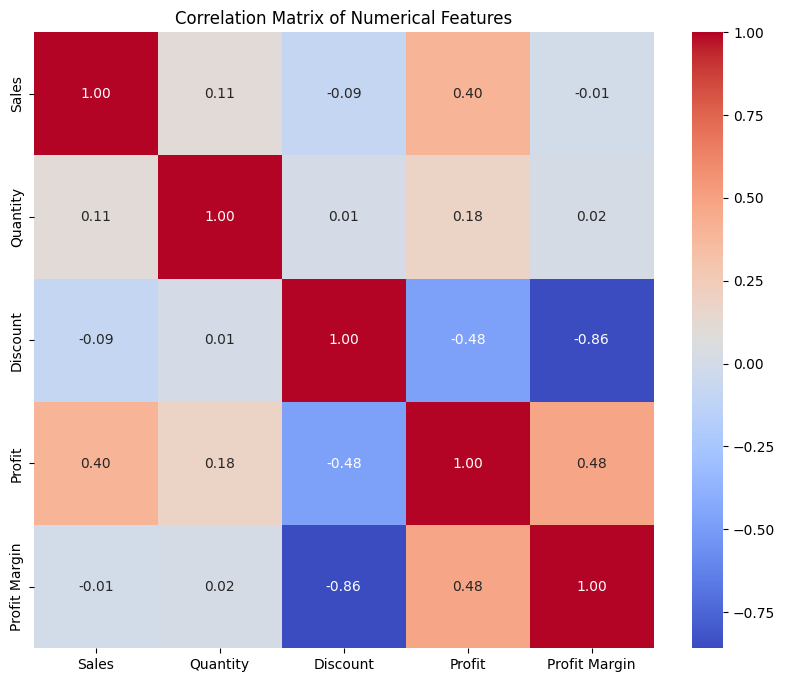

In [96]:
# Check correlation
correlation_matrix = df_clean.corr(numeric_only=True)
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**1. Strong Negative Impact of Discounts on Profit Margin (-0.859631)**
- **Insight**: The correlation between **Discount** and **Profit Margin** is extremely negative, suggesting that as discounts increase, the profit margin decreases significantly. This implies that high discounting is eroding the company's profitability.
- **Recommendation**: Evaluate the discount strategy to incentivize larger orders or long-term commitments, while minimizing the negative impact on profit margins.

**2. Moderate Positive Correlation Between Sales and Profit (0.398444)**
- **Insight**: There is a moderate positive correlation between **Sales** and **Profit**, indicating that higher sales typically lead to higher profits, but the effect is not perfectly linear. While increasing sales will boost profit, it’s not the only factor influencing profitability.
- **Recommendation**: Ensure that the products or services being sold are profitable. Prioritize high-margin products or services that contribute more to profitability per unit sold.

**3. Discounts Have a Strong Negative Impact on Profit (-0.477405)**
- **Insight**: There is a moderate negative correlation between **Discount** and **Profit**, suggesting that higher discounts are associated with lower profit levels. Offering deep discounts may drive more sales, but it significantly impacts the overall profitability of each transaction.
- **Recommendation**: Reevaluate discounting strategies to strike a balance between driving sales and maintaining profitability. Implement volume-based or customer loyalty discounts to ensure better margin retention.

**4. Sales and Profit Margin Are Uncorrelated (-0.005965)**
- **Insight**: There is a near-zero correlation between **Sales** and **Profit Margin**, indicating that total sales do not directly influence the profitability of each transaction. This suggests that profit margins remain relatively consistent across different sales volumes.
- **Recommendation**: Focus on improving profit margins independently of sales volume. Consider reducing operational costs or improving product pricing to increase margins without needing to increase sales significantly.

**5. Weak Positive Correlation Between Quantity and Profit (0.184168)**
- **Insight**: The weak positive correlation between **Quantity** and **Profit** suggests that while selling more units contributes to higher profit, the effect is relatively small. This indicates that increasing the number of units sold doesn’t necessarily lead to proportional profit growth.
- **Recommendation**: Instead of just focusing on increasing quantity, prioritize selling higher-value or higher-margin products.

**Conclusion**

The heatmap analysis provides a view of the interdependencies between key business metrics: Profit, Sales, Discount, Quantity, and Profit Margin. While increasing sales can boost profit, the effect isn't huge and depends on other factors. The main issue is with **discounts**, which are having a strong negative impact on profit margins and overall profit. To improve profitability, the company should focus on reducing heavy discounts, selling more high-margin products, and refining pricing strategies. Instead of just selling more units, it would be better to **focus on upselling and attracting higher-value customers**. By focusing on both increasing sales and protecting profit margins, the company can achieve more stable and long-term growth.

# Conclusion: Insights and Recommendations

Based on the analysis of **sales**, **profit**, **customer demand**, and **market trends**, here are the key findings and recommendations to help grow the business and focus on high-demand products.

## Key Insights:

1. **Top-Performing Products**:
   - **Alchemy**, **Site Analytics**, and **Data Smasher** are the best products in terms of both **sales** and **profit**. These products should be the main focus for **investment** and **development**.
   - **Marketing Suite** and **Big Ol Database** sell well but have **low profit**, likely due to high discounts or other issues. These products need further review to improve profitability.

2. **Discounts and Profit**:
   - **Discounts** are hurting **profit margins**, meaning that while discounts may increase sales, they reduce overall profitability. It’s important to rethink the **discount strategy** and focus on offering **loyalty** or **volume-based discounts** instead.

3. **Customer Demand**:
   - The most important customers are small and medium businesses (**SMBs**) in industries like **Finance**, **Healthcare**, and **Manufacturing**, with **ContactMatcher** being a key product for **customer loyalty**. This product should be highlighted in **upselling** and **cross-selling** efforts.

4. **Geographic Trends**:
   - The **US**, **UK**, and **Japan** are the top-performing regions, showing high demand for products like **ContactMatcher** and **Site Analytics**. Marketing efforts should focus on these regions.
   - **Denmark**, **Qatar**, and **Iceland** are underperforming, and reevaluation  of strategies may be needed in these markets.

5. **Sales and Profit**:
   - There is a positive link between **sales** and **profit**, but increasing sales alone won’t always boost profits. The company should focus more on improving **profit margins** through better **pricing** and **cost management**.


## Recommendations:

1. **Invest in Top Products**:
   - Continue to develop and promote **Alchemy**, **Site Analytics**, and **Data Smasher**, as these generate the most **sales** and **profit**. Look into how to improve the profitability of **Marketing Suite** and **Big Ol Database**.

2. **Reconsider Discounts**:
   - Since **discounts** reduce **profit**, the company should cut back on large discounts and shift to offering **volume-based** or **loyalty** discounts, which can keep customers happy without harming profitability.

3. **Leverage Customer Loyalty**:
   - **ContactMatcher** is a key driver of customer loyalty. Focus on **upselling** and offering more value to existing customers, especially in the **Finance** and **Healthcare** sectors.

4. **Focus on Key Markets**:
   - Strengthen marketing efforts in high-performing regions like the **US**, **UK**, and **Japan**. For underperforming markets like **Denmark**, consider adjusting the approach based on specific customer needs or market conditions.

5. **Improve Profit Margins**:
   - Focus on **optimizing pricing** and finding ways to cut costs, which will help improve profits without relying solely on increasing sales.

## Final Conclusion:

To grow the business, focus on **high-demand, high-profit products** like **Alchemy** and **Site Analytics**, and improve the **discount strategy** to protect profit margins. Target key regions and customer segments, especially those where products like **ContactMatcher** have strong demand. Lastly, work on improving **profit margins** through better pricing and cost management to ensure long-term success.
